<a href="https://colab.research.google.com/github/hurutta/XFedAi/blob/main/XFedAi_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install shap

In [3]:
import pandas as pd
import federated_shap
import numpy as np
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import sklearn
import shap
shap.initjs()
from sklearn.linear_model import LinearRegression

Original Shap Dummy Testing:
  reference = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
          x = [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
shap_values = [ 0.89146267 -0.43752168 -0.31836259 -0.58464256  0.3666341  -1.4865503
  0.76350731 -0.67882376  0.3074461  -0.09561896]
 base_value = 9.999999999999885
   sum(phi) = 8.727530334777724
       f(x) = 8.727530334714547
Federated Shap Dummy Testing:
  reference = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
          x = [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
shap_values = [ 0.89146267 -0.43752168 -0.31836259 -0.58464256  0.3666341  -1.4865503
  0.29651069]
 base_value = 10.00000000000004
   sum(phi) = 8.727530334712396
       f(x) = 8.727530334714547


In [4]:
import io
from google.colab import files
#uploaded = files.upload()
corona_data = pd.read_csv('/content/drive/MyDrive/thesis - all_code/coronavirus_sequences_table.csv')
cov2_data = pd.read_csv('/content/drive/MyDrive/thesis - all_code/sars_cov2_sequences_table.csv')

print(cov2_data.shape)
print(cov2_data.columns)
cov2_data.head()

(559, 17)
Index(['Details', 'Accession', 'Release_Date', 'Species', 'Genus', 'Family',
       'Length', 'Genotype', 'Genome_Region', 'Segment', 'Protein',
       'Geo_Location', 'Host', 'Isolation_Source', 'Collection_Date',
       'BioSample', 'GenBank_Title'],
      dtype='object')


,Details,Accession,Release_Date,Species,Genus,Family,Length,Genotype,Genome_Region,Segment,Protein,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NaN,QHR63260,2020-01-29T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,1273,NaN,NaN,NaN,spike glycoprotein,China,Homo sapiens,lung,2019-12-30,NaN,spike glycoprotein [Severe acute respiratory s...
1,NaN,QHR63265,2020-01-29T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,121,NaN,NaN,NaN,nonstructural protein NS7a,China,Homo sapiens,lung,2019-12-30,NaN,nonstructural protein NS7a [Severe acute respi...
2,NaN,QHR63267,2020-01-29T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,121,NaN,NaN,NaN,nonstructural protein NS8,China,Homo sapiens,lung,2019-12-30,NaN,nonstructural protein NS8 [Severe acute respir...
3,NaN,QHR63261,2020-01-29T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,275,NaN,NaN,NaN,nonstructural protein NS3,China,Homo sapiens,lung,2019-12-30,NaN,nonstructural protein NS3 [Severe acute respir...
4,NaN,QHR63264,2020-01-29T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,61,NaN,NaN,NaN,nonstructural protein NS6,China,Homo sapiens,lung,2019-12-30,NaN,nonstructural protein NS6 [Severe acute respir...


In [5]:
cov2_data.isnull().sum()

Details             559
Accession             0
Release_Date          0
Species               0
Genus                 0
Family                0
Length                0
Genotype            559
Genome_Region       559
Segment             559
Protein               0
Geo_Location          0
Host                  0
Isolation_Source    166
Collection_Date       0
BioSample           559
GenBank_Title         0
dtype: int64

In [6]:
cov2_data=cov2_data.drop(['Details','Genotype','Genome_Region','Segment','BioSample','Species','Family','Host','Accession','Genus','Release_Date'],axis=1)

In [7]:
cov2_data.shape

(559, 6)

In [8]:
#cov2_data=cov2_data.dropna(subset=['Details', 'Accession', 'Release_Date', 'Species', 'Genus', 'Family',
#       'Length', 'Genotype', 'Genome_Region', 'Segment', 'Protein',
#       'Geo_Location', 'Host', 'Isolation_Source', 'Collection_Date',
#       'BioSample', 'GenBank_Title'],axis=0) 

In [9]:
print(cov2_data.shape)
cov2_data

(559, 6)


,Length,Protein,Geo_Location,Isolation_Source,Collection_Date,GenBank_Title
0,1273,spike glycoprotein,China,lung,2019-12-30,spike glycoprotein [Severe acute respiratory s...
1,121,nonstructural protein NS7a,China,lung,2019-12-30,nonstructural protein NS7a [Severe acute respi...
2,121,nonstructural protein NS8,China,lung,2019-12-30,nonstructural protein NS8 [Severe acute respir...
3,275,nonstructural protein NS3,China,lung,2019-12-30,nonstructural protein NS3 [Severe acute respir...
4,61,nonstructural protein NS6,China,lung,2019-12-30,nonstructural protein NS6 [Severe acute respir...
...,...,...,...,...,...,...
554,61,ORF6 protein,China,oronasopharynx,2020-02-05,ORF6 protein [Severe acute respiratory syndrom...
555,121,ORF7a protein,China,oronasopharynx,2020-02-05,ORF7a protein [Severe acute respiratory syndro...
556,121,ORF8 protein,China,oronasopharynx,2020-02-05,ORF8 protein [Severe acute respiratory syndrom...
557,419,nucleocapsid phosphoprotein,China,oronasopharynx,2020-02-05,nucleocapsid phosphoprotein [Severe acute resp...


In [10]:
cov2_data['Protein'].unique().size

49

In [11]:
cov2_data2=cov2_data['GenBank_Title']
print(cov2_data2.size)
for i in range(0,cov2_data2.size,1):
    a,b = cov2_data2[i].split("[") 
    b=b[:-1]
    cov2_data2[i]=b

cov2_data2

559



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      Severe acute respiratory syndrome coronavirus 2
1      Severe acute respiratory syndrome coronavirus 2
2      Severe acute respiratory syndrome coronavirus 2
3      Severe acute respiratory syndrome coronavirus 2
4      Severe acute respiratory syndrome coronavirus 2
                            ...                       
554    Severe acute respiratory syndrome coronavirus 2
555    Severe acute respiratory syndrome coronavirus 2
556    Severe acute respiratory syndrome coronavirus 2
557    Severe acute respiratory syndrome coronavirus 2
558    Severe acute respiratory syndrome coronavirus 2
Name: GenBank_Title, Length: 559, dtype: object

In [12]:
cov2_data['GenBank_Title']=cov2_data2

In [13]:
print(cov2_data.columns)
cov2_data.head()

Index(['Length', 'Protein', 'Geo_Location', 'Isolation_Source',
       'Collection_Date', 'GenBank_Title'],
      dtype='object')


,Length,Protein,Geo_Location,Isolation_Source,Collection_Date,GenBank_Title
0,1273,spike glycoprotein,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
1,121,nonstructural protein NS7a,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
2,121,nonstructural protein NS8,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
3,275,nonstructural protein NS3,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
4,61,nonstructural protein NS6,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2


In [14]:
cov2_data['Collection_Date'].unique()

array(['2019-12-30', '2020-01-22', '2020-01-01', '2020-01-29',
       '2020-01-20', '2020-01', '2020-01-31', '2020-01-26', '2019-12-23',
       '2020-01-08', '2020-01-02', '2020-01-19', '2020-01-23',
       '2020-01-11', '2020-01-25', '2020-02-03', '2020-01-24',
       '2020-02-06', '2020-02', '2020-01-13', '2019-12', '2020-01-28',
       '2020-01-17', '2020-02-05', '2020-01-27', '2020-01-21',
       '2020-01-10', '2020-01-30', '2020-02-07', '2020-02-23',
       '2020-02-11', '2020-02-10'], dtype=object)

In [15]:
#cov2_data2=cov2_data['Collection_Date']
#df["column3"] = ""
#print(cov2_data2)
cov2_data.insert(0,'Collection_Day','')
cov2_data.insert(0,'Collection_Month','')
cov2_data.insert(0,'Collection_Year','')



In [16]:
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,Protein,Geo_Location,Isolation_Source,Collection_Date,GenBank_Title
0,,,,1273,spike glycoprotein,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
1,,,,121,nonstructural protein NS7a,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
2,,,,121,nonstructural protein NS8,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
3,,,,275,nonstructural protein NS3,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
4,,,,61,nonstructural protein NS6,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2
...,...,...,...,...,...,...,...,...,...
554,,,,61,ORF6 protein,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2
555,,,,121,ORF7a protein,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2
556,,,,121,ORF8 protein,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2
557,,,,419,nucleocapsid phosphoprotein,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2


In [17]:
cov2_data.columns
cov2_data.shape

cov2_data2=cov2_data['Collection_Date']
for i in range(0,cov2_data2.size,1):
    try:
        a,b,c = cov2_data2[i].split("-")
        cov2_data['Collection_Year'][i]=int(a)
        cov2_data['Collection_Month'][i]=int(b)
        cov2_data['Collection_Day'][i]=int(c)
    except:
        a,b = cov2_data2[i].split("-")
        cov2_data['Collection_Year'][i]=int(a)
        cov2_data['Collection_Month'][i]=int(b)
        cov2_data['Collection_Day'][i]=np.NaN
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [18]:
cov2_data['Collection_Day'].unique()
cov2_data['Collection_Month'].unique()
cov2_data['GenBank_Title'].unique()
print(cov2_data['GenBank_Title'])
print(cov2_data['GenBank_Title'].unique())

0      Severe acute respiratory syndrome coronavirus 2
1      Severe acute respiratory syndrome coronavirus 2
2      Severe acute respiratory syndrome coronavirus 2
3      Severe acute respiratory syndrome coronavirus 2
4      Severe acute respiratory syndrome coronavirus 2
                            ...                       
554    Severe acute respiratory syndrome coronavirus 2
555    Severe acute respiratory syndrome coronavirus 2
556    Severe acute respiratory syndrome coronavirus 2
557    Severe acute respiratory syndrome coronavirus 2
558    Severe acute respiratory syndrome coronavirus 2
Name: GenBank_Title, Length: 559, dtype: object
['Severe acute respiratory syndrome coronavirus 2'
 'Wuhan seafood market pneumonia virus']


In [19]:
set1={""}
set2={""}
set3={""}
for i in range(0,cov2_data['GenBank_Title'].size,1):
    if cov2_data['GenBank_Title'][i] == "Severe acute respiratory syndrome coronavirus 2":
        set1.add(cov2_data['Protein'][i])
        set3.add(cov2_data['Protein'][i])
    else:
        set2.add(cov2_data['Protein'][i])
        set3.add(cov2_data['Protein'][i])

set4 = set1 & set2 
set5 = set1 - set2 
print("matched : ",len(set4)," miss_matched : ",len(set5))

matched :  13  miss_matched :  21


In [20]:
#cov2_data['Isolation_Source'].unique()
cov2_data.isnull().sum()

Collection_Year       0
Collection_Month      0
Collection_Day      115
Length                0
Protein               0
Geo_Location          0
Isolation_Source    166
Collection_Date       0
GenBank_Title         0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(cov2_data[['Collection_Day']])
cov2_data['Collection_Day']=impute.transform(cov2_data[['Collection_Day']])

In [22]:
cov2_data.isnull().sum()

Collection_Year       0
Collection_Month      0
Collection_Day        0
Length                0
Protein               0
Geo_Location          0
Isolation_Source    166
Collection_Date       0
GenBank_Title         0
dtype: int64

# =====================================================================

---



In [23]:
prt=cov2_data['Protein']
cov2_data['Protein'].unique().size

49

In [24]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=4, input_type='string')
hashed_features = fh.fit_transform(cov2_data['Protein'])
hashed_features = hashed_features.toarray()
for i in range(0,30,1):
    print(cov2_data['Protein'][i],"\t",hashed_features[i])
#pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]
cov2_data.shape
#cov2_data.insert(0,'Collection_Day','')
cov2_data=pd.concat([cov2_data, pd.DataFrame(hashed_features)], axis=1)
print(cov2_data.shape)
print(cov2_data.head())
cov2_data=cov2_data.drop(['Protein'],axis=1)
print(cov2_data.shape)

spike glycoprotein 	 [ 1. -2. -2.  1.]
nonstructural protein NS7a 	 [ 2.  1.  1. -2.]
nonstructural protein NS8 	 [ 1.  0.  0. -2.]
nonstructural protein NS3 	 [ 2.  1.  0. -2.]
nonstructural protein NS6 	 [ 2.  1.  0. -2.]
membrane glycoprotein 	 [ 2. -1.  0.  4.]
nucleocapsid phosphoprotein 	 [ 1. -5. -3.  4.]
orf1ab polyprotein 	 [ 1. -1.  0.  4.]
orf7a protein 	 [1. 1. 0. 3.]
envelope protein 	 [ 0.  0. -2.  4.]
surface glycoprotein 	 [ 2. -1.  0.  3.]
orf3a protein 	 [1. 1. 0. 3.]
ORF8 protein 	 [ 0.  0. -1.  1.]
orf8 protein 	 [ 0.  0. -1.  3.]
membrane glycoprotein 	 [ 2. -1.  0.  4.]
envelope protein 	 [ 0.  0. -2.  4.]
orf1ab polyprotein 	 [ 1. -1.  0.  4.]
nucleocapsid phosphoprotein 	 [ 1. -5. -3.  4.]
orf10 protein 	 [ 0. -1. -1.  3.]
orf6 protein 	 [ 1.  1. -1.  3.]
orf7a protein 	 [1. 1. 0. 3.]
surface glycoprotein 	 [ 2. -1.  0.  3.]
orf3a protein 	 [1. 1. 0. 3.]
nucleocapsid phosphoprotein 	 [ 1. -5. -3.  4.]
orf3a protein 	 [1. 1. 0. 3.]
orf10 protein 	 [ 0. -1. -1.  3

In [25]:
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,Geo_Location,Isolation_Source,Collection_Date,GenBank_Title,0,1,2,3
0,2019,12,30.0,1273,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,-2.0,-2.0,1.0
1,2019,12,30.0,121,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,1.0,-2.0
2,2019,12,30.0,121,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,0.0,0.0,-2.0
3,2019,12,30.0,275,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0
4,2019,12,30.0,61,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
554,2020,2,5.0,61,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,-1.0,1.0
555,2020,2,5.0,121,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,0.0,1.0
556,2020,2,5.0,121,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,0.0,0.0,-1.0,1.0
557,2020,2,5.0,419,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,-5.0,-3.0,4.0


In [26]:
cov2_data=cov2_data.rename(columns={0: 'A',1:'B',2: 'C',3: 'D'})    # A B C D - hashed for geo location

In [27]:
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,Geo_Location,Isolation_Source,Collection_Date,GenBank_Title,A,B,C,D
0,2019,12,30.0,1273,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,-2.0,-2.0,1.0
1,2019,12,30.0,121,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,1.0,-2.0
2,2019,12,30.0,121,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,0.0,0.0,-2.0
3,2019,12,30.0,275,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0
4,2019,12,30.0,61,China,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
554,2020,2,5.0,61,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,-1.0,1.0
555,2020,2,5.0,121,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,0.0,1.0
556,2020,2,5.0,121,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,0.0,0.0,-1.0,1.0
557,2020,2,5.0,419,China,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,-5.0,-3.0,4.0


In [28]:
cov2_data['Geo_Location'].unique().size

14

In [29]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(cov2_data['Geo_Location'])
hashed_features = hashed_features.toarray()
for i in range(30,60,1):
    print(cov2_data['Geo_Location'][i],"\t",hashed_features[i])
#pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]
cov2_data.shape
#cov2_data.insert(0,'Collection_Day','')


USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
China 	 [ 0. -3.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
South Korea 	 [1. 2.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]
USA 	 [-1.  0.]


(559, 12)

In [30]:
cov2_data=pd.concat([cov2_data, pd.DataFrame(hashed_features)], axis=1)
print(cov2_data.shape)
print(cov2_data.head())
cov2_data=cov2_data.drop(['Geo_Location'],axis=1)
print(cov2_data.shape)

(559, 14)
  Collection_Year Collection_Month  Collection_Day  Length  ...    C    D    0    1
0            2019               12            30.0    1273  ... -2.0  1.0  0.0 -3.0
1            2019               12            30.0     121  ...  1.0 -2.0  0.0 -3.0
2            2019               12            30.0     121  ...  0.0 -2.0  0.0 -3.0
3            2019               12            30.0     275  ...  0.0 -2.0  0.0 -3.0
4            2019               12            30.0      61  ...  0.0 -2.0  0.0 -3.0

[5 rows x 14 columns]
(559, 13)


In [31]:
cov2_data=cov2_data.rename(columns={0: 'E',1:'F'})              # E F - protein name
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,Isolation_Source,Collection_Date,GenBank_Title,A,B,C,D,E,F
0,2019,12,30.0,1273,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,-2.0,-2.0,1.0,0.0,-3.0
1,2019,12,30.0,121,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,1.0,-2.0,0.0,-3.0
2,2019,12,30.0,121,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,0.0,0.0,-2.0,0.0,-3.0
3,2019,12,30.0,275,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0,0.0,-3.0
4,2019,12,30.0,61,lung,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2020,2,5.0,61,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,-1.0,1.0,0.0,-3.0
555,2020,2,5.0,121,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,0.0,1.0,0.0,-3.0
556,2020,2,5.0,121,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,0.0,0.0,-1.0,1.0,0.0,-3.0
557,2020,2,5.0,419,oronasopharynx,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,-5.0,-3.0,4.0,0.0,-3.0


# =====================================================================

---



In [32]:
cov2_data = pd.get_dummies(cov2_data,columns=['Isolation_Source'])

In [33]:
cov2_data.isnull().sum()

Collection_Year                          0
Collection_Month                         0
Collection_Day                           0
Length                                   0
Collection_Date                          0
GenBank_Title                            0
A                                        0
B                                        0
C                                        0
D                                        0
E                                        0
F                                        0
Isolation_Source_blood                   0
Isolation_Source_feces                   0
Isolation_Source_lung                    0
Isolation_Source_lung, oronasopharynx    0
Isolation_Source_oronasopharynx          0
Isolation_Source_swab                    0
dtype: int64

In [34]:
"""50
0 0 0 0 0 
0 0 0 0 1
0 0 0 1 0
0 0 0 1 1"""

'50\n0 0 0 0 0 \n0 0 0 0 1\n0 0 0 1 0\n0 0 0 1 1'

In [35]:
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,Collection_Date,GenBank_Title,A,B,C,D,E,F,Isolation_Source_blood,Isolation_Source_feces,Isolation_Source_lung,"Isolation_Source_lung, oronasopharynx",Isolation_Source_oronasopharynx,Isolation_Source_swab
0,2019,12,30.0,1273,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,-2.0,-2.0,1.0,0.0,-3.0,0,0,1,0,0,0
1,2019,12,30.0,121,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,1.0,-2.0,0.0,-3.0,0,0,1,0,0,0
2,2019,12,30.0,121,2019-12-30,Severe acute respiratory syndrome coronavirus 2,1.0,0.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
3,2019,12,30.0,275,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
4,2019,12,30.0,61,2019-12-30,Severe acute respiratory syndrome coronavirus 2,2.0,1.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2020,2,5.0,61,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,-1.0,1.0,0.0,-3.0,0,0,0,0,1,0
555,2020,2,5.0,121,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,1.0,0.0,1.0,0.0,-3.0,0,0,0,0,1,0
556,2020,2,5.0,121,2020-02-05,Severe acute respiratory syndrome coronavirus 2,0.0,0.0,-1.0,1.0,0.0,-3.0,0,0,0,0,1,0
557,2020,2,5.0,419,2020-02-05,Severe acute respiratory syndrome coronavirus 2,1.0,-5.0,-3.0,4.0,0.0,-3.0,0,0,0,0,1,0


In [36]:
cov2_data=cov2_data.drop(['Collection_Date'],axis=1)
cov2_data.shape

(559, 17)

In [37]:
cov2_data['GenBank_Title']=cov2_data['GenBank_Title'].map({'Severe acute respiratory syndrome coronavirus 2': 1, 'Wuhan seafood market pneumonia virus': 0})

In [38]:
cov2_data

,Collection_Year,Collection_Month,Collection_Day,Length,GenBank_Title,A,B,C,D,E,F,Isolation_Source_blood,Isolation_Source_feces,Isolation_Source_lung,"Isolation_Source_lung, oronasopharynx",Isolation_Source_oronasopharynx,Isolation_Source_swab
0,2019,12,30.0,1273,1,1.0,-2.0,-2.0,1.0,0.0,-3.0,0,0,1,0,0,0
1,2019,12,30.0,121,1,2.0,1.0,1.0,-2.0,0.0,-3.0,0,0,1,0,0,0
2,2019,12,30.0,121,1,1.0,0.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
3,2019,12,30.0,275,1,2.0,1.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
4,2019,12,30.0,61,1,2.0,1.0,0.0,-2.0,0.0,-3.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2020,2,5.0,61,1,1.0,1.0,-1.0,1.0,0.0,-3.0,0,0,0,0,1,0
555,2020,2,5.0,121,1,1.0,1.0,0.0,1.0,0.0,-3.0,0,0,0,0,1,0
556,2020,2,5.0,121,1,0.0,0.0,-1.0,1.0,0.0,-3.0,0,0,0,0,1,0
557,2020,2,5.0,419,1,1.0,-5.0,-3.0,4.0,0.0,-3.0,0,0,0,0,1,0


In [39]:
#print(cov2_data['GenBank_Title'].unique())
cov2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Collection_Year                        559 non-null    object 
 1   Collection_Month                       559 non-null    object 
 2   Collection_Day                         559 non-null    float64
 3   Length                                 559 non-null    int64  
 4   GenBank_Title                          559 non-null    int64  
 5   A                                      559 non-null    float64
 6   B                                      559 non-null    float64
 7   C                                      559 non-null    float64
 8   D                                      559 non-null    float64
 9   E                                      559 non-null    float64
 10  F                                      559 non-null    float64
 11  Isolat

                                       Collection_Day  ...  Isolation_Source_swab
Collection_Day                           1.000000e+00  ...          -2.797312e-17
Length                                  -1.507529e-02  ...          -4.287545e-02
GenBank_Title                           -1.711394e-17  ...           2.391910e-02
A                                        2.563110e-02  ...           5.252884e-03
B                                        9.300558e-03  ...          -1.974181e-02
C                                        2.278865e-03  ...           7.407181e-02
D                                       -5.214585e-02  ...           9.054327e-02
E                                       -1.300892e-02  ...           9.487160e-03
F                                        1.956533e-02  ...          -9.787210e-02
Isolation_Source_blood                   2.795582e-18  ...          -4.409567e-03
Isolation_Source_feces                   1.489831e-02  ...          -1.405811e-02
Isolation_Source

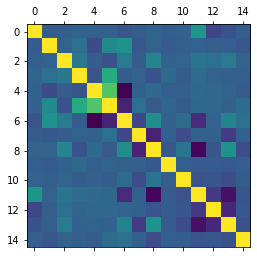

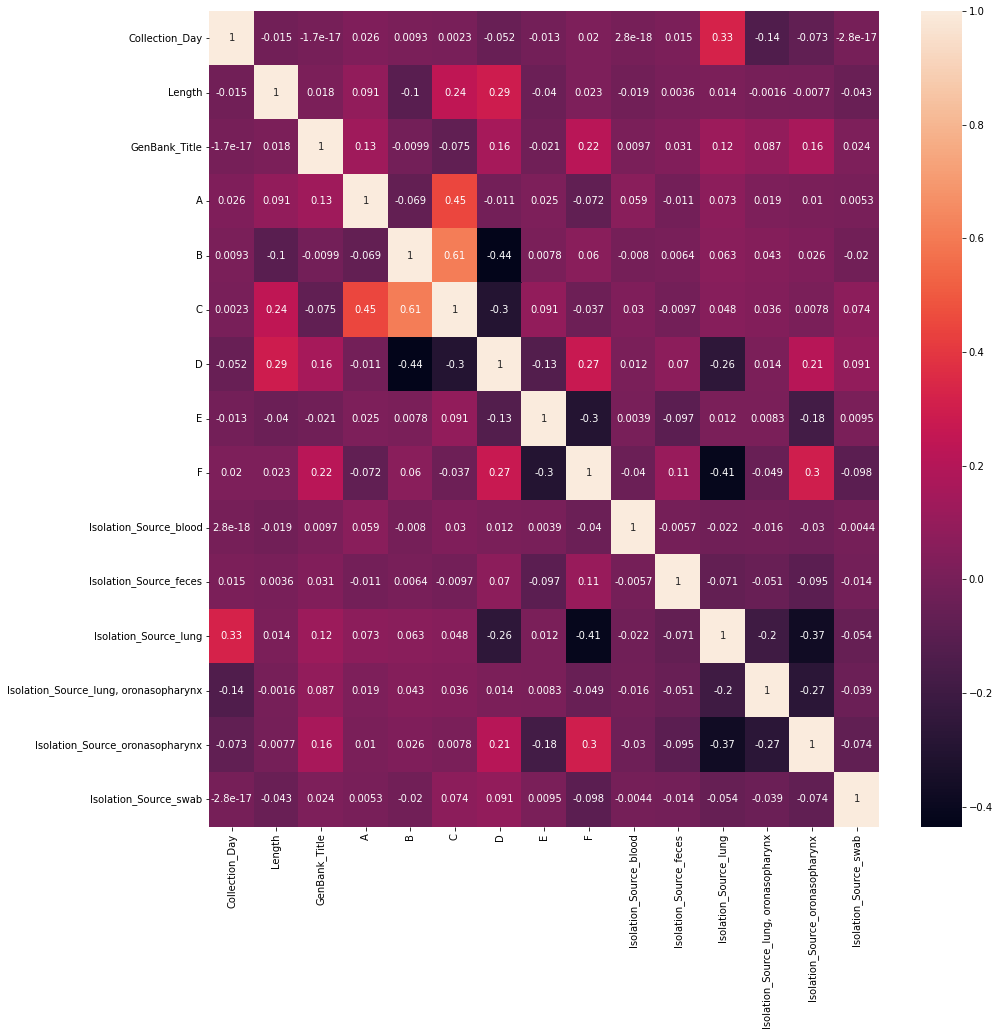

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
co_re=cov2_data.corr()               #co relation of features
plt.matshow(co_re)

print(co_re)
plt.show()                      #heat map of co relation
plt.figure(figsize = (15,15))
sn.heatmap(co_re,annot=True)   #heat map with more info

In [41]:
cov2_data.columns

Index(['Collection_Year', 'Collection_Month', 'Collection_Day', 'Length',
       'GenBank_Title', 'A', 'B', 'C', 'D', 'E', 'F', 'Isolation_Source_blood',
       'Isolation_Source_feces', 'Isolation_Source_lung',
       'Isolation_Source_lung, oronasopharynx',
       'Isolation_Source_oronasopharynx', 'Isolation_Source_swab'],
      dtype='object')

In [42]:
cov2_data=cov2_data.drop(['A','B'],axis=1)
cov2_data.columns

Index(['Collection_Year', 'Collection_Month', 'Collection_Day', 'Length',
       'GenBank_Title', 'C', 'D', 'E', 'F', 'Isolation_Source_blood',
       'Isolation_Source_feces', 'Isolation_Source_lung',
       'Isolation_Source_lung, oronasopharynx',
       'Isolation_Source_oronasopharynx', 'Isolation_Source_swab'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
#print(data.columns

lebel=['GenBank_Title']
features=[]
X=cov2_data[['Length',
        'C', 'D', 'E', 'F', 'Isolation_Source_blood',
       'Isolation_Source_feces', 'Isolation_Source_lung',
       'Isolation_Source_lung, oronasopharynx',
       'Isolation_Source_oronasopharynx', 'Isolation_Source_swab']]
       
y=cov2_data[lebel]      

#X=X.drop(['GenBank_Title'],axis=1)
print(X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=4)  #splitting train-test 70%-30%
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Index(['Length', 'C', 'D', 'E', 'F', 'Isolation_Source_blood',
       'Isolation_Source_feces', 'Isolation_Source_lung',
       'Isolation_Source_lung, oronasopharynx',
       'Isolation_Source_oronasopharynx', 'Isolation_Source_swab'],
      dtype='object')
(391, 11) (391, 1) (168, 11) (168, 1)


In [53]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()  #hyper para needed -         , k fold
knn.fit(X_train,y_train)
acr=knn.score(X_test, y_test)*100
print("Accuracy : {:.2f}".format(acr),"%")


Accuracy : 96.43 %


In [56]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
acr2=svm.score(X_test,y_test)*100
print("Accuracy : {:.2f}".format(acr2),"%")

Accuracy : 95.24 %


In [57]:

#train model
knn_norm = sklearn.neighbors.KNeighborsClassifier()
knn_norm.fit(X_train, y_train)
acr3=knn_norm.score(X_test,y_test)*100
print("Accuracy : {:.2f}".format(acr3),"%")

Accuracy : 96.43 %


In [58]:
X_train.shape

(391, 11)

In [59]:
import pandas as pd
import federated_shap
import numpy as np
#Explain the model
f_knn = lambda x: knn_norm.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
x = np.array(X_train.iloc[0])
#x = np.array(X_train_norm.loc[2583])
M = 11
fs = federated_shap.federated_shap()
print(f_knn(X_train).shape)

(391,)


In [ ]:
#!pip install -q --upgrade ipython
#!pip install -q --upgrade ipykernel

Shap Values


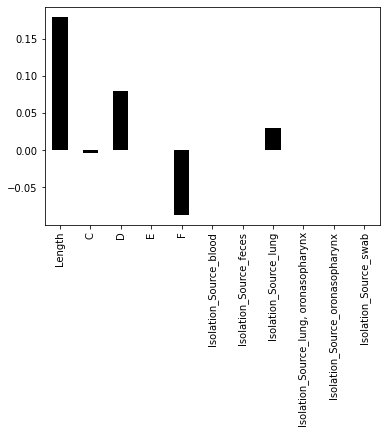

In [60]:
# shap
phi = fs.kernel_shap(f_knn, x, med, M)
base_value = phi[-1]
shap_values = phi[:-1]
shap_values_df = pd.DataFrame(data = np.array([shap_values]), columns = list(X_train))
print("Shap Values")
#shap_values_df
row = shap_values_df.iloc[0]
row.plot(kind='bar', color='k')

In [61]:
##########################################
shap.initjs()
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, shap_values_df.iloc[0,:])
##########################################

(168,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy : 96.43 %


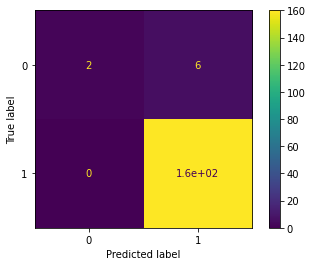

In [62]:
print(y_test.shape)
model = lambda x: knn_norm.predict_proba(x)[:,1]
y_pred=model(X_test)

for i in range(0,len(y_pred),1):
    if y_pred[i] >= .5:
        y_pred[i]=1
    else: 
        y_pred[i]=0

print(y_pred)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

acr3=accuracy_score(y_test,y_pred)*100
print("Accuracy : {:.2f}".format(acr3),"%")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
con=confusion_matrix(y_test, y_pred)

============================================

[121.   1.  -2.   0.  -3.   0.   0.   1.   0.   0.   0.]
Federated Shap Values


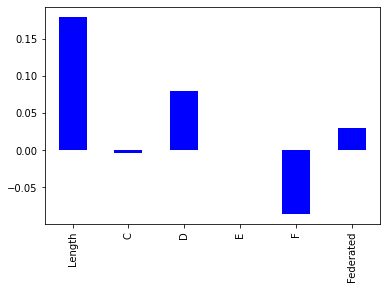

In [63]:
# federated shap
fed_pos = 5
print(x)
phi = fs.kernel_shap_federated(f_knn, x, med, M, fed_pos)
base_value = phi[-1]
shap_values = phi[:-1]
new_columns = list(X_train)[:fed_pos]
new_columns.extend(['Federated'])
shap_values_df = pd.DataFrame(data = np.array([shap_values]), columns = new_columns)
print("Federated Shap Values")
#shap_values_df.plot()
row = shap_values_df.iloc[0]
row.plot(kind='bar', color='b')

In [73]:
#Aggregated and average shap
shap_values_whole = []
counttt = 0
for index, row in X_train.iterrows():
    counttt += 1
    if counttt > 50:
        break
    x = row
    phi = fs.kernel_shap(f_knn, x, med, M)
    base_value = phi[-1]
    shap_values = phi[:-1]
    shap_values_whole.append(list(shap_values))
shap_values_whole = np.array(shap_values_whole)
print(shap_values_whole)

    

[[ 1.80000055e-01 -3.33327825e-03  8.00000551e-02  5.50917321e-08
  -8.66666116e-02  5.50871846e-08  5.50935511e-08  3.00000551e-02
   5.50935511e-08  5.50935511e-08  5.50917321e-08]
 [ 2.00000000e-01 -2.72848411e-12  9.09494702e-13 -2.72848411e-12
  -9.09494702e-13 -3.63797881e-12  3.63797881e-12 -2.72848411e-12
   3.63797881e-12  1.81898940e-12  3.63797881e-12]
 [ 1.66666667e-01 -9.09494702e-13 -2.72848411e-12 -1.81898940e-12
  -6.66666667e-02 -3.63797881e-12  3.63797881e-12  1.00000000e-01
   2.72848411e-12  5.45696821e-12  1.81898940e-12]
 [ 1.83333333e-01 -3.63797881e-12  1.66666667e-02 -2.72848411e-12
  -8.33333333e-02  0.00000000e+00  1.81898940e-12  8.33333333e-02
   2.72848411e-12  1.81898940e-12  9.09494702e-13]
 [ 2.00000000e-01 -9.09494702e-13 -1.81898940e-12 -3.63797881e-12
  -1.00000000e-01 -1.81898940e-12  1.81898940e-12  1.00000000e-01
   4.54747351e-12  2.72848411e-12  0.00000000e+00]
 [ 1.83333609e-01  2.75449565e-07  5.00002755e-02  2.75450475e-07
  -8.33330579e-02  

In [74]:
#Aggregated and average federated shap
shap_values_whole = []
cols_federated_7 = ['Length', 'C', 'D', 'E', 'F', 'Isolation_Source_blood',
       'Isolation_Source_feces']
cols_federated_5 = ['Length','Isolation_Source_blood','Isolation_Source_lung','Isolation_Source_lung, oronasopharynx']
counttt = 0
M = 11
fed_pos = 6
for index, row in X_train.iterrows():
    counttt += 1
    if counttt > 1000:
        break
    x = np.array(row)
    #print('x',x)
    #print('M',M)
    #print('fed_pos',fed_pos)
    #print(med)
    phi = fs.kernel_shap_federated(f_knn, x, med, M, fed_pos)
    base_value = phi[-1]
    shap_values = phi[:-1]
    shap_values_whole.append(list(shap_values))
shap_values_whole = np.array(shap_values_whole)
#print(shap_values_whole)

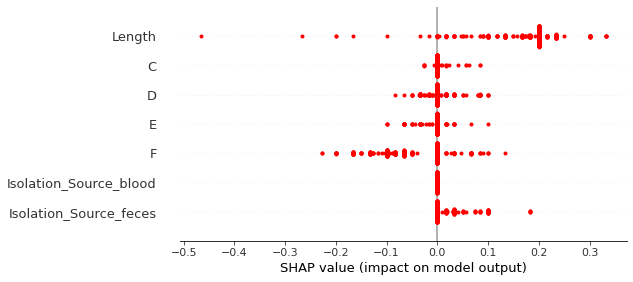

In [76]:
shap.summary_plot(shap_values_whole, feature_names = cols_federated_7 ,sort=False, color = 'r')

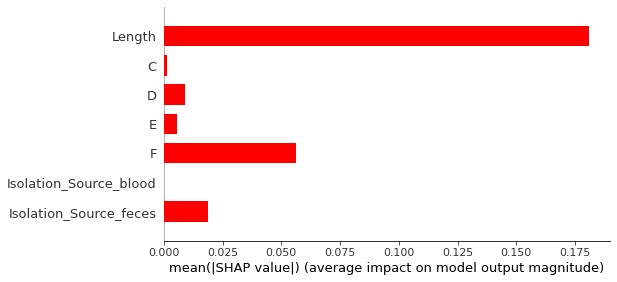

In [77]:
shap.summary_plot(shap_values_whole, feature_names = cols_federated_7 ,sort=False,  plot_type="bar", color = 'r')

In [70]:
X_train.loc[250]

Length                                   75.0
C                                        -2.0
D                                         4.0
E                                         0.0
F                                        -3.0
Isolation_Source_blood                    0.0
Isolation_Source_feces                    0.0
Isolation_Source_lung                     1.0
Isolation_Source_lung, oronasopharynx     0.0
Isolation_Source_oronasopharynx           0.0
Isolation_Source_swab                     0.0
Name: 250, dtype: float64